In [6]:
#importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

yf.pdr_override() #use yahoo finance dataset
dataset = yf

oct = yf.download('COST', '2013-1-1', '2023-11-1') # downloads Costco stock price from January 2013 to October of this year

octdf = pd.DataFrame(oct) #creates dataframe to hold the data for october
octdf.head() #displays first five columns of the dataframe

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,100.599998,101.449997,100.209999,101.449997,82.717522,3153800
2013-01-03,102.110001,103.019997,101.760002,102.489998,83.565529,3872400
2013-01-04,102.550003,102.910004,101.550003,102.160004,83.296440,1989000
2013-01-07,101.089996,101.730003,100.900002,101.370003,82.652298,1663900
2013-01-08,101.000000,101.790001,100.730003,101.180000,82.497383,2189900


In [7]:
percentile75 = octdf.Close.quantile(0.75) # Get the 75% percentile of the closing price
percentile25 = octdf.Close.quantile(0.25) # Get the 25% percentile of the closing price

#equation for added feature is (daily close price - percentile25)/(percentile75 - percentile 25)
#create empty lists
dailyValueProportion = [] # dailyValueProportion equals (daily close price - percentile25)/(percentile75 - percentile 25)
highlowDifference = [] # highlowDifference equals daily highPrice - lowPrice
opencloseDifference = [] # opencloseDifference equals daily openPrice - closePrice

for i in range (0, len(octdf) ): #loop that takes in all the rows of closing values and calculates the Daily Value Proportion feature from them
  dailyClosePrice = octdf.iloc[i].Close
  calculation = (dailyClosePrice - percentile25)/(percentile75 - percentile25) #
  dailyValueProportion.append(calculation) # add dailyValueProportion to its empty list

for i in range (0, len(octdf) ): #obtains the high - low daily price
  highPrice = octdf.iloc[i].High
  lowPrice = octdf.iloc[i].Low
  calculation = (highPrice - lowPrice)
  highlowDifference.append(calculation)# add highlowDifference to its empty list

for i in range (0, len(octdf) ): #obtains the close - open daily price
  openPrice = octdf.iloc[i].Close
  closePrice = octdf.iloc[i].Open
  calculation = (openPrice - closePrice)
  opencloseDifference.append(calculation)# add opencloseDifference to its empty list

octdf['Daily_Value_Proportion'] = dailyValueProportion #adds the Daily Value Proportion to the dataframe as a feature
octdf['H-L'] = highlowDifference #adds the difference between the highest and lowest price for the day as a feature to our feature set
octdf['O-C'] = opencloseDifference #adds the difference between the opening and closing price for the day as a feature to our feature set
# now we get 3 new columns(features)
print(octdf)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02  100.599998  101.449997  100.209999  101.449997   82.717522   
2013-01-03  102.110001  103.019997  101.760002  102.489998   83.565529   
2013-01-04  102.550003  102.910004  101.550003  102.160004   83.296440   
2013-01-07  101.089996  101.730003  100.900002  101.370003   82.652298   
2013-01-08  101.000000  101.790001  100.730003  101.180000   82.497383   
...                ...         ...         ...         ...         ...   
2023-10-25  548.549988  553.830017  545.609985  549.989990  548.982483   
2023-10-26  549.650024  554.659973  545.530029  547.599976  546.596863   
2023-10-27  547.599976  548.030029  540.229980  543.030029  542.035278   
2023-10-30  545.739990  556.359985  543.640015  554.880005  553.863525   
2023-10-31  552.159973  554.030029  549.059998  552.440002  551.427979   

             Volume  Daily_Value_Prop

In [8]:
#dropping adjusted closing price from our dataset
newdf = octdf.drop(columns = ('Adj Close'), axis = 1)
#removes volume as a feature from our dataset
newdf = newdf.drop(columns = ('Volume'), axis = 1 )
print(newdf)

                  Open        High         Low       Close  \
Date                                                         
2013-01-02  100.599998  101.449997  100.209999  101.449997   
2013-01-03  102.110001  103.019997  101.760002  102.489998   
2013-01-04  102.550003  102.910004  101.550003  102.160004   
2013-01-07  101.089996  101.730003  100.900002  101.370003   
2013-01-08  101.000000  101.790001  100.730003  101.180000   
...                ...         ...         ...         ...   
2023-10-25  548.549988  553.830017  545.609985  549.989990   
2023-10-26  549.650024  554.659973  545.530029  547.599976   
2023-10-27  547.599976  548.030029  540.229980  543.030029   
2023-10-30  545.739990  556.359985  543.640015  554.880005   
2023-10-31  552.159973  554.030029  549.059998  552.440002   

            Daily_Value_Proportion        H-L       O-C  
Date                                                     
2013-01-02               -0.207033   1.239998  0.849998  
2013-01-03         

R^2 score: 0.9999503284334096


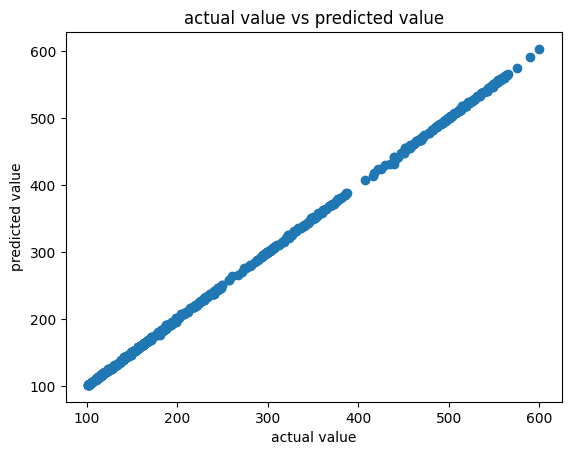

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
newdf = octdf.drop(columns=['Adj Close', 'Volume'])

X = newdf.drop('Close', axis=1)
y = newdf['Close']

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# get r2 score
r2 = r2_score(y_test, predictions)

print(f"R^2 score: {r2}")

# Plot a scatter plot of actual values versus predicted values
plt.scatter(y_test, predictions)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("actual value vs predicted value")
plt.show()